In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
#from sklearn.datasets import fetch_olivetti_faces

In [ ]:
def cov_value(x,y):
    mean_x = np.mean(x,axis=0)
    print(mean_x)
    mean_y = np.mean(y,axis=0)
    cov = np.sum(np.dot((x-mean_x),(y-mean_y)),axis=0)/(len(x)-1)

    return cov

In [ ]:
def cov(X):

  co=np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(i+1):
      co[i][j]=cov_value(X[:,i],X[:,j])
      co[j][i]=co[i][j]
  return co

In [ ]:
def PCA(X,compNum=2):
  normX = X - np.mean(X,axis=0)


  covmat1 = cov(normX)
  covmat2 = np.cov(normX,rowvar=False)
  print(covmat2)
  print(covmat1)

  eigval, eigvec = np.linalg.eigh(covmat1)
  sortedind = np.argsort(eigval)[::-1]
  sorted_eigval = eigval[sortedind]
  sorted_eigvec = eigvec[:, sortedind]

  reductvects=sorted_eigvec[:,:compNum]
  reduct=np.dot(reductvects.transpose(), normX.transpose())

  decom=np.dot(reductvects, reduct).transpose()+ np.mean(X,axis=0)


  return reduct,decom

In [ ]:
iris = datasets.load_iris()
x=iris.data
t=iris.target
reduct,de=PCA(x,4)

[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
-1.1842378929335002e-15
-7.815970093361102e-16
-7.815970093361102e-16
-2.7474319116057207e-15
-2.7474319116057207e-15
-2.7474319116057207e-15
-7.105427357601002e-16
-7.105427357601002e-16
-7.105427357601002e-16
-7.105427357601002e-16
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


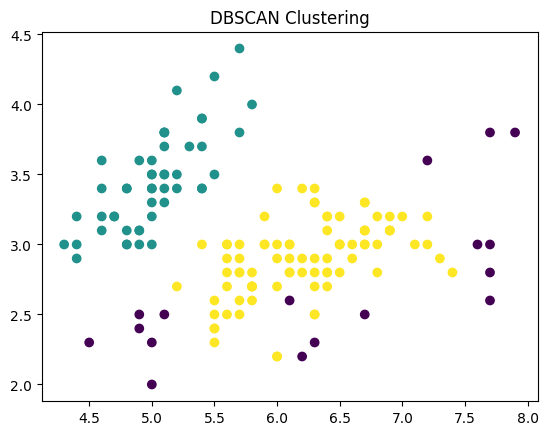

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(de)

plt.scatter(de[:, 0], de[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your feature matrix and 'labels' are DBSCAN cluster labels
silhouette_avg = silhouette_score(de, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4860341970345691


In [ ]:
X, y = make_blobs(n_samples=800, centers=5, random_state=42,n_features=15)
reduct,de=PCA(X,3)

[[ 13.15519126  -4.45500154  -8.24530097   8.19922498   7.28103786
   11.05745143  13.54910479   4.17750277  13.63675707  -1.3634377
   -2.38073054  -1.53909872 -11.17147142  -4.86239825   4.07368576]
 [ -4.45500154  32.15640534  14.69755137  -2.50295905 -18.08147837
  -25.30020991 -10.9786942   19.20301827   3.57826846   5.14653968
  -22.22996029  28.97399019  30.33138173 -21.08224677  -6.73944713]
 [ -8.24530097  14.69755137  29.19012176 -18.95737921 -27.99689261
  -16.73813227  -7.93961344  28.00088317 -16.14899243  17.48674094
   12.19791515   0.80088256  11.63034252 -11.80442339   9.75443988]
 [  8.19922498  -2.50295905 -18.95737921  17.93843363  20.31700392
    5.42249265   2.96745022 -15.3364308   14.15387063 -10.18175841
  -21.29424256  10.86990544  -4.25326028   5.87431815  -6.02715462]
 [  7.28103786 -18.08147837 -27.99689261  20.31700392  37.10746446
   12.46699076  -0.89073716 -33.3903782    5.19322679 -12.0049038
  -19.31118072   2.26998171 -19.91926367  28.22900898  -2.05

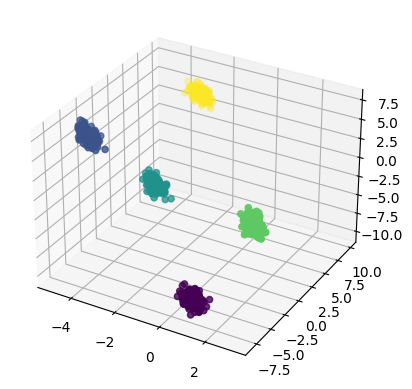

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=7)
labels = dbscan.fit_predict(de)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(de[:, 0], de[:, 1], de[:, 2], c=labels, cmap='viridis')

plt.show()